# Transforming intent
# ===================
# 




## Load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [58]:
from sklearn.pipeline import make_pipeline, Pipeline

import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold


time: 1.41 ms (started: 2023-01-20 15:25:05 -05:00)


In [4]:
import sys

In [5]:
sys.version

'3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:24:02) \n[Clang 11.1.0 ]'

In [6]:
pd.options.display.max_rows = 2000

In [7]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 475 µs (started: 2023-01-17 18:43:27 -05:00)


## Load data

In [9]:
!ls -l ./data

total 2120
-rw-r--r--  1 szalmaf  staff    2036 Jan 17 12:39 categories.json
-rw-r--r--  1 szalmaf  staff  239961 Jan 17 12:39 test.csv
-rw-r--r--  1 szalmaf  staff  839073 Jan 17 12:39 train.csv
time: 172 ms (started: 2023-01-17 18:46:05 -05:00)


In [13]:
drctry = r'./data/'
df_train = pd.read_csv(drctry + 'train.csv')

time: 26.2 ms (started: 2023-01-17 18:51:30 -05:00)


In [14]:
df_train

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival
...,...,...
9998,You provide support in what countries?,country_support
9999,What countries are you supporting?,country_support
10000,What countries are getting support?,country_support
10001,Are cards available in the EU?,country_support


time: 21.3 ms (started: 2023-01-17 18:51:34 -05:00)


In [18]:
df_train['category'].unique()

array(['card_arrival', 'card_linking', 'exchange_rate',
       'card_payment_wrong_exchange_rate', 'extra_charge_on_statement',
       'pending_cash_withdrawal', 'fiat_currency_support',
       'card_delivery_estimate', 'automatic_top_up', 'card_not_working',
       'exchange_via_app', 'lost_or_stolen_card', 'age_limit',
       'pin_blocked', 'contactless_not_working',
       'top_up_by_bank_transfer_charge', 'pending_top_up',
       'cancel_transfer', 'top_up_limits',
       'wrong_amount_of_cash_received', 'card_payment_fee_charged',
       'transfer_not_received_by_recipient',
       'supported_cards_and_currencies', 'getting_virtual_card',
       'card_acceptance', 'top_up_reverted',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'card_payment_not_recognised', 'edit_personal_details',
       'why_verify_identity', 'unable_to_verify_identity',
       'get_physical_card', 'visa_or_mastercard', 'topping_up_by_card',
       'disposable_card_limits', 'compromised_card

time: 9.46 ms (started: 2023-01-17 19:03:42 -05:00)


### Basic stats of dataset

#### Intent distribution

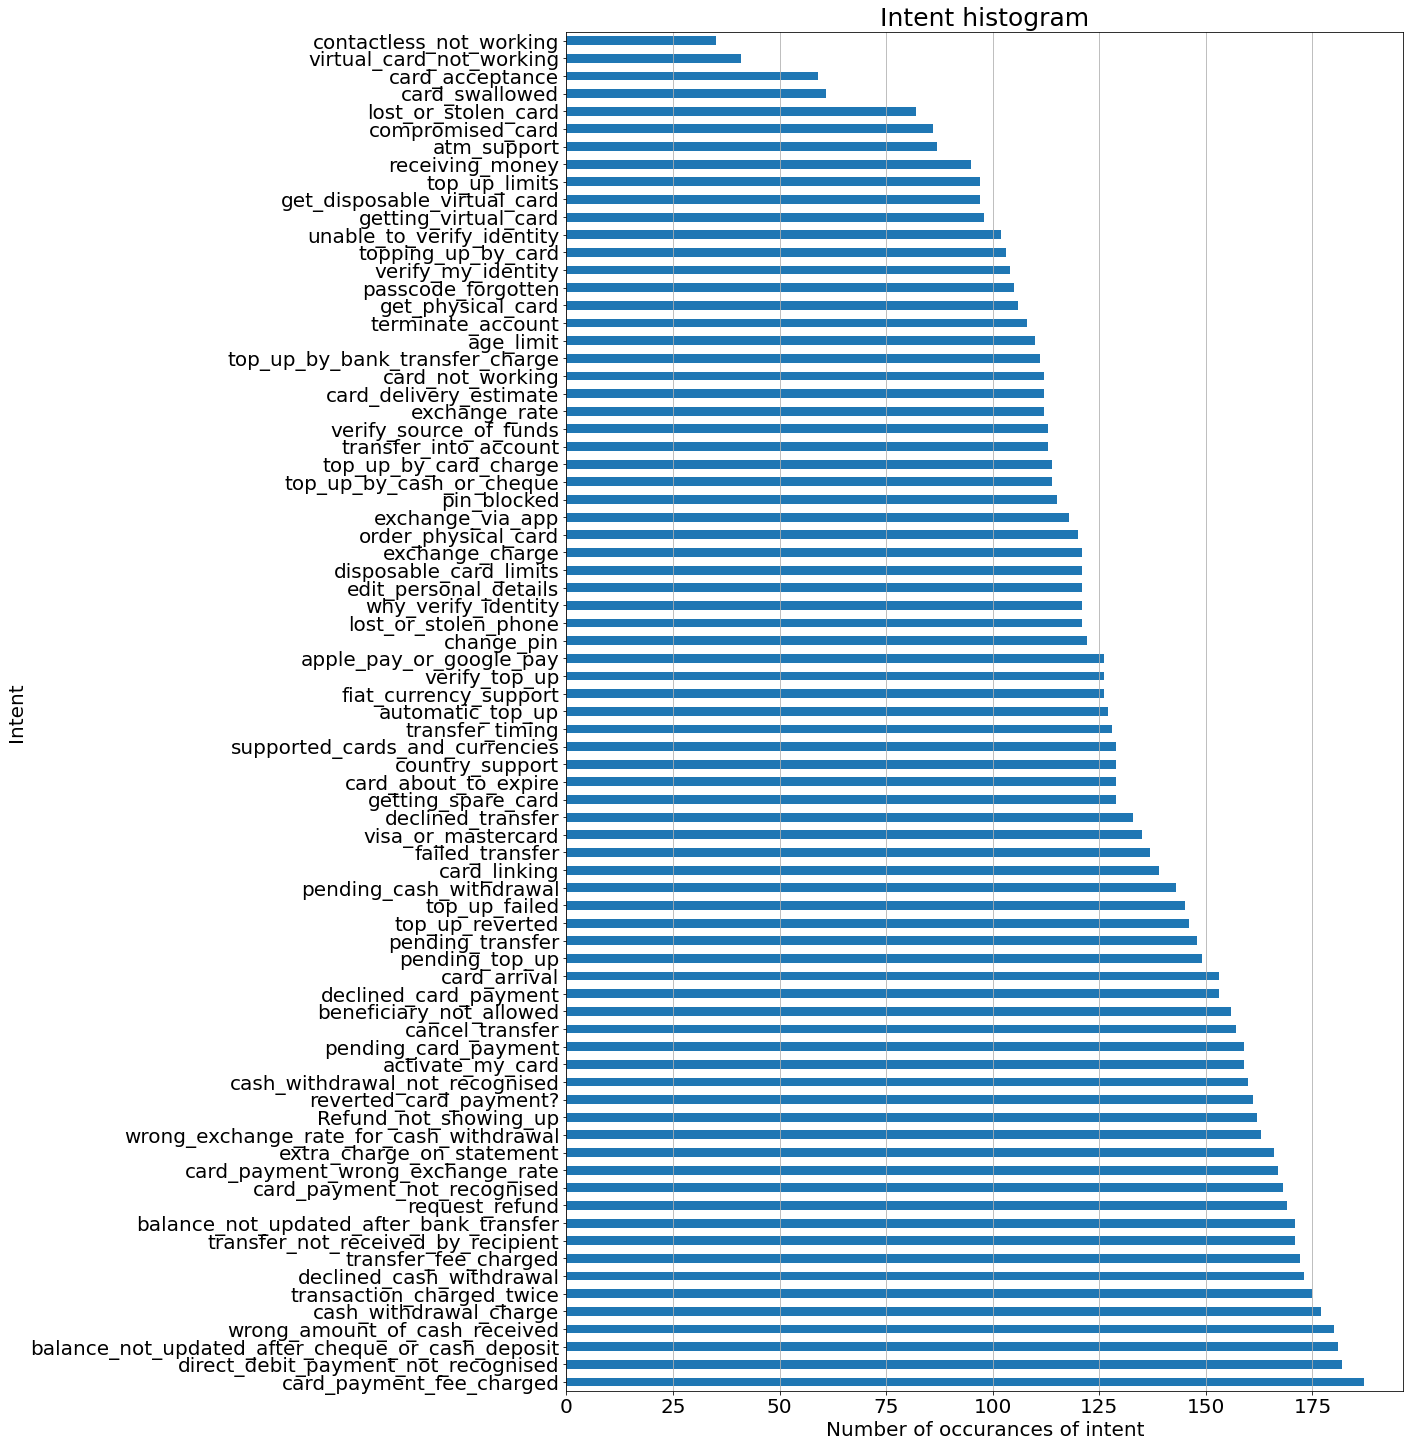

time: 588 ms (started: 2023-01-17 19:09:47 -05:00)


In [22]:
# Subintent distribution
ax = df_train['category'].value_counts(normalize=False).plot.barh(figsize=(15,25))
ax.set_title('Intent histogram', fontsize=25)
ax.set_xlabel('Number of occurances of intent', fontsize=20)
ax.set_ylabel('Intent', fontsize=20)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid(axis='x')

In [24]:
pd.DataFrame(pd.Series([item for item in df_train["category"]]).value_counts(normalize=False))

,0
card_payment_fee_charged,187
direct_debit_payment_not_recognised,182
balance_not_updated_after_cheque_or_cash_deposit,181
wrong_amount_of_cash_received,180
cash_withdrawal_charge,177
transaction_charged_twice,175
declined_cash_withdrawal,173
transfer_fee_charged,172
transfer_not_received_by_recipient,171
balance_not_updated_after_bank_transfer,171


time: 25 ms (started: 2023-01-17 19:10:45 -05:00)


## Word vectors

### Tf-idf (term frequncy inverse document frequency) word vectors

#### 10003 utterances, vocabulary of 2320 words

In [30]:
cntvectzr = CountVectorizer()
data_counts = cntvectzr.fit_transform(df_train['text'])
data_counts.shape

(10003, 2320)

time: 71.3 ms (started: 2023-01-17 19:18:56 -05:00)


In [31]:
data_tfidf = TfidfTransformer().fit_transform(data_counts)
data_tfidf.shape

(10003, 2320)

time: 17.9 ms (started: 2023-01-17 19:18:58 -05:00)


In [32]:
pd.DataFrame(data_tfidf.toarray().T, index=cntvectzr.get_feature_names())

/Users/szalmaf/.pyenv/versions/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,10000,10001,10002
00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
youngest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
your,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.378917,0.0,0.0,0.0,0.0,0.0,0.0,0.0
youre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 44 ms (started: 2023-01-17 19:18:58 -05:00)


## Modeling: Naive Bayes model

### Model pipeline

In [55]:
modelNB = make_pipeline(
                CountVectorizer(),
                TfidfTransformer(),
                ComplementNB())  #force_alpha=True))

time: 1.95 ms (started: 2023-01-20 15:22:56 -05:00)


### Learning curve

In [64]:
train_sizes = np.logspace(np.log(0.2), np.log(1.0), num=10, endpoint=True)  # np.linspace(0.1, 1.0, num=10, endpoint=True)

time: 868 µs (started: 2023-01-20 15:26:24 -05:00)


In [65]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

time: 420 µs (started: 2023-01-20 15:26:25 -05:00)


In [66]:
results = learning_curve(estimator = modelNB,
                         X = df_train['text'],
                         y = df_train['category'],
                         train_sizes = train_sizes,
                         cv = cv,
                         scoring ='f1_macro')
train_size, train_scores, test_scores = results[:3]

time: 2.41 s (started: 2023-01-20 15:26:25 -05:00)


In [67]:
train_size

array([ 196,  296,  448,  676, 1021, 1541, 2326, 3511, 5301, 8002])

time: 6.7 ms (started: 2023-01-20 15:26:28 -05:00)


In [68]:
train_scores, test_scores

(array([[0.98955112, 0.98384216, 0.98406288, 0.98266867, 0.98367347],
        [0.99133615, 0.98445963, 0.99411704, 0.98726941, 0.99023215],
        [0.98162225, 0.97304166, 0.97875573, 0.98154839, 0.98642077],
        [0.97987939, 0.98157501, 0.98019019, 0.98556519, 0.98656181],
        [0.97226905, 0.96502443, 0.96728527, 0.96626739, 0.97002029],
        [0.91765351, 0.90629371, 0.90748604, 0.95926895, 0.96020052],
        [0.92215094, 0.92477879, 0.92382624, 0.92021479, 0.92351626],
        [0.89934911, 0.89709077, 0.89435557, 0.89698225, 0.90418595],
        [0.8556751 , 0.86117064, 0.8601013 , 0.86369014, 0.87217275],
        [0.79181957, 0.79654908, 0.79487736, 0.79019316, 0.79003381]]),
 array([[0.00143286, 0.0015222 , 0.00164701, 0.00120594, 0.0014634 ],
        [0.00325505, 0.0030489 , 0.00339861, 0.00274552, 0.00290471],
        [0.00606686, 0.01050972, 0.00576687, 0.00473474, 0.00493654],
        [0.01386059, 0.01372848, 0.01350964, 0.01073122, 0.01211484],
        [0.0304739

time: 6.34 ms (started: 2023-01-20 15:26:29 -05:00)


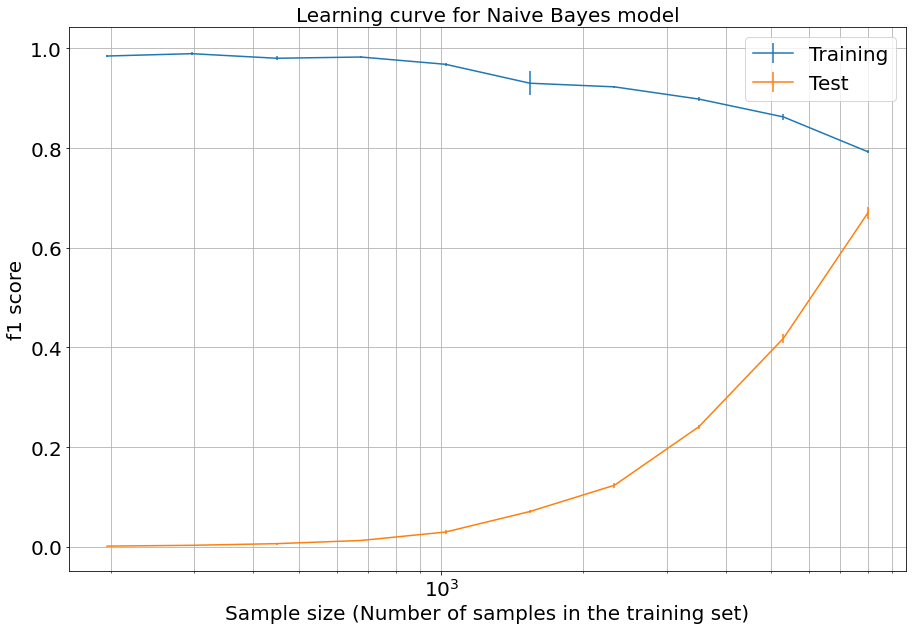

time: 135 ms (started: 2023-01-20 15:26:29 -05:00)


In [69]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.errorbar(train_size, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label="Training")
plt.errorbar(train_size, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label="Test")

plt.title("Learning curve for Naive Bayes model", fontsize=20)
plt.legend(fontsize=20)
plt.xscale("log")
plt.xlabel("Sample size (Number of samples in the training set)", fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("f1 score", fontsize=20)
plt.yticks(fontsize=20)

plt.grid(which='both')